In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('banknotes.csv')

In [6]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [14]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### separate Inputs & Outputs variables

In [19]:
x= df[['Variance','Skewness','Curtosis','Entropy']]
y=df['Class']

In [21]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [24]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


#### Exploratory  Data Analysis

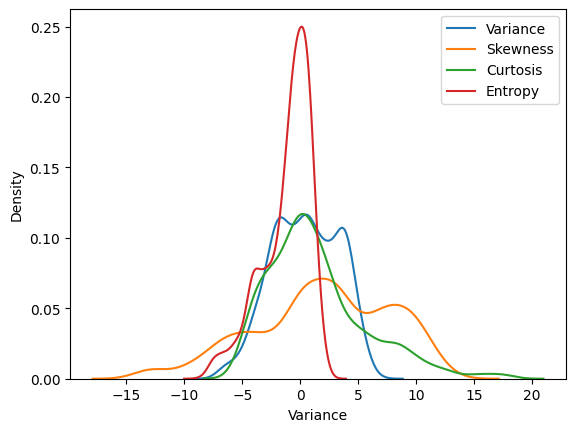

In [31]:
sns.kdeplot(x['Variance'], label='Variance');
sns.kdeplot(x['Skewness'], label='Skewness');
sns.kdeplot(x['Curtosis'],label='Curtosis');
sns.kdeplot(x['Entropy'], label='Entropy');
plt.legend()

In [32]:
np.unique(y)

array([0, 1])

In [33]:
set(y)

{0, 1}

In [34]:
from collections import Counter
Counter(y)

Counter({0: 762, 1: 610})

In [35]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

/tmp/ipykernel_25216/2604520238.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='tab10')


<Axes: xlabel='Class', ylabel='count'>

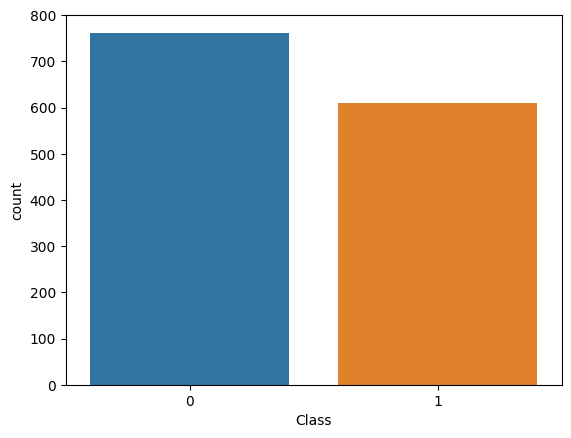

In [45]:
sns.countplot(x=y, palette='tab10')

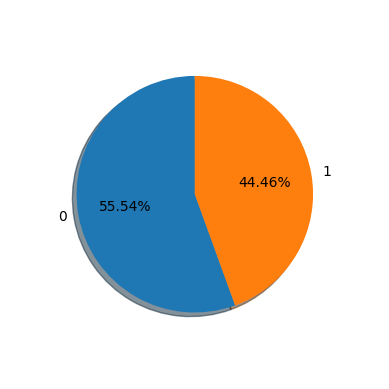

In [52]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct= '%2.2f%%', shadow=True, radius=0.8, startangle=90);

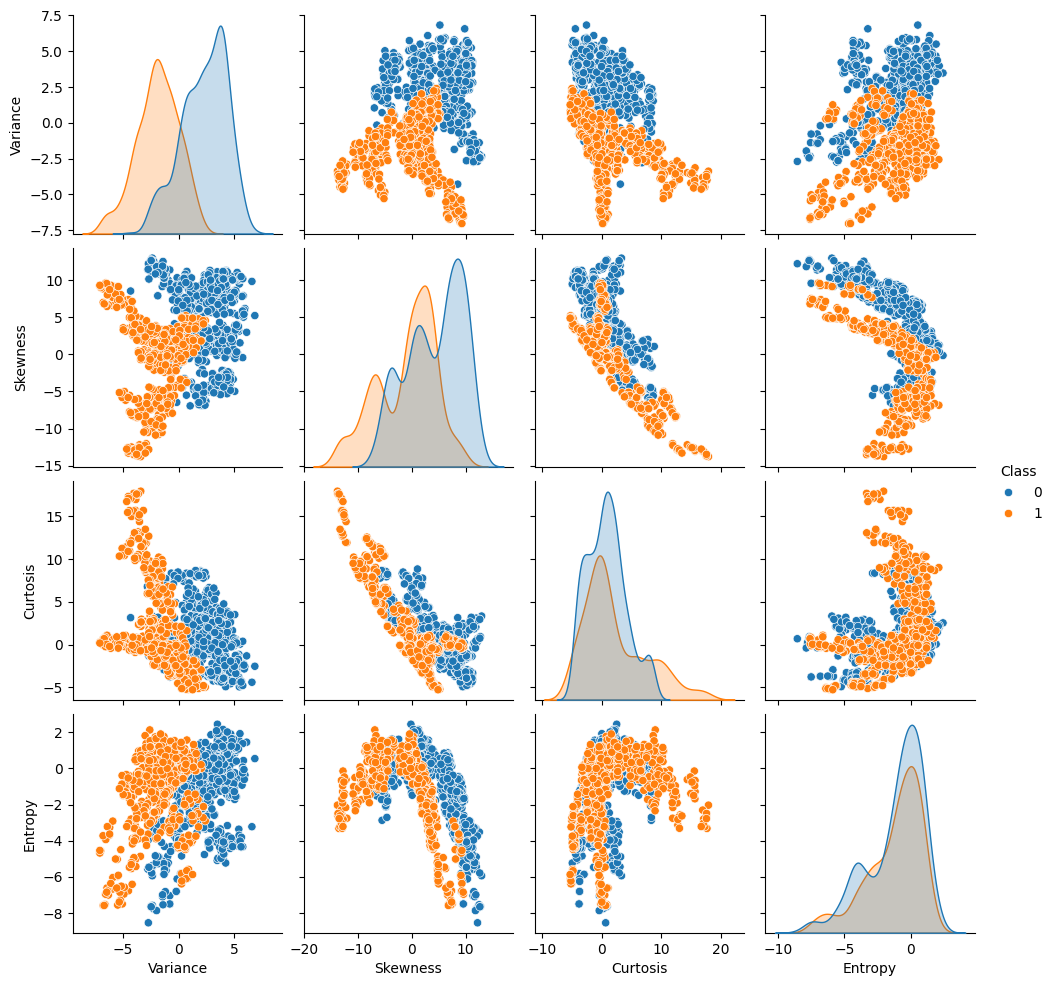

In [53]:
sns.pairplot(df, hue='Class')

### Cross Validation

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=0)

In [76]:
x_train.shape

(1029, 4)

In [77]:
x_test.shape

(343, 4)

In [78]:
y_train.shape

(1029,)

In [79]:
y_test.shape

(343,)

In [80]:
x_train

,Variance,Skewness,Curtosis,Entropy
662,2.97360,8.794400,-3.635900,-1.375400
512,2.66480,10.754000,-3.399400,-4.168500
1193,-3.75730,-8.291600,10.303200,0.380590
682,3.73210,-3.884000,3.357700,-0.006049
1313,-1.50780,-7.319100,7.898100,1.228900
...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840
835,-0.94255,0.039307,-0.241920,0.315930
1216,0.60050,0.999450,-2.212600,0.097399
559,2.01650,-0.252460,5.170700,1.076300


#### Build the Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier(random_state=0)

In [83]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
#### Plot the Tree

In [85]:
from sklearn.tree import plot_tree

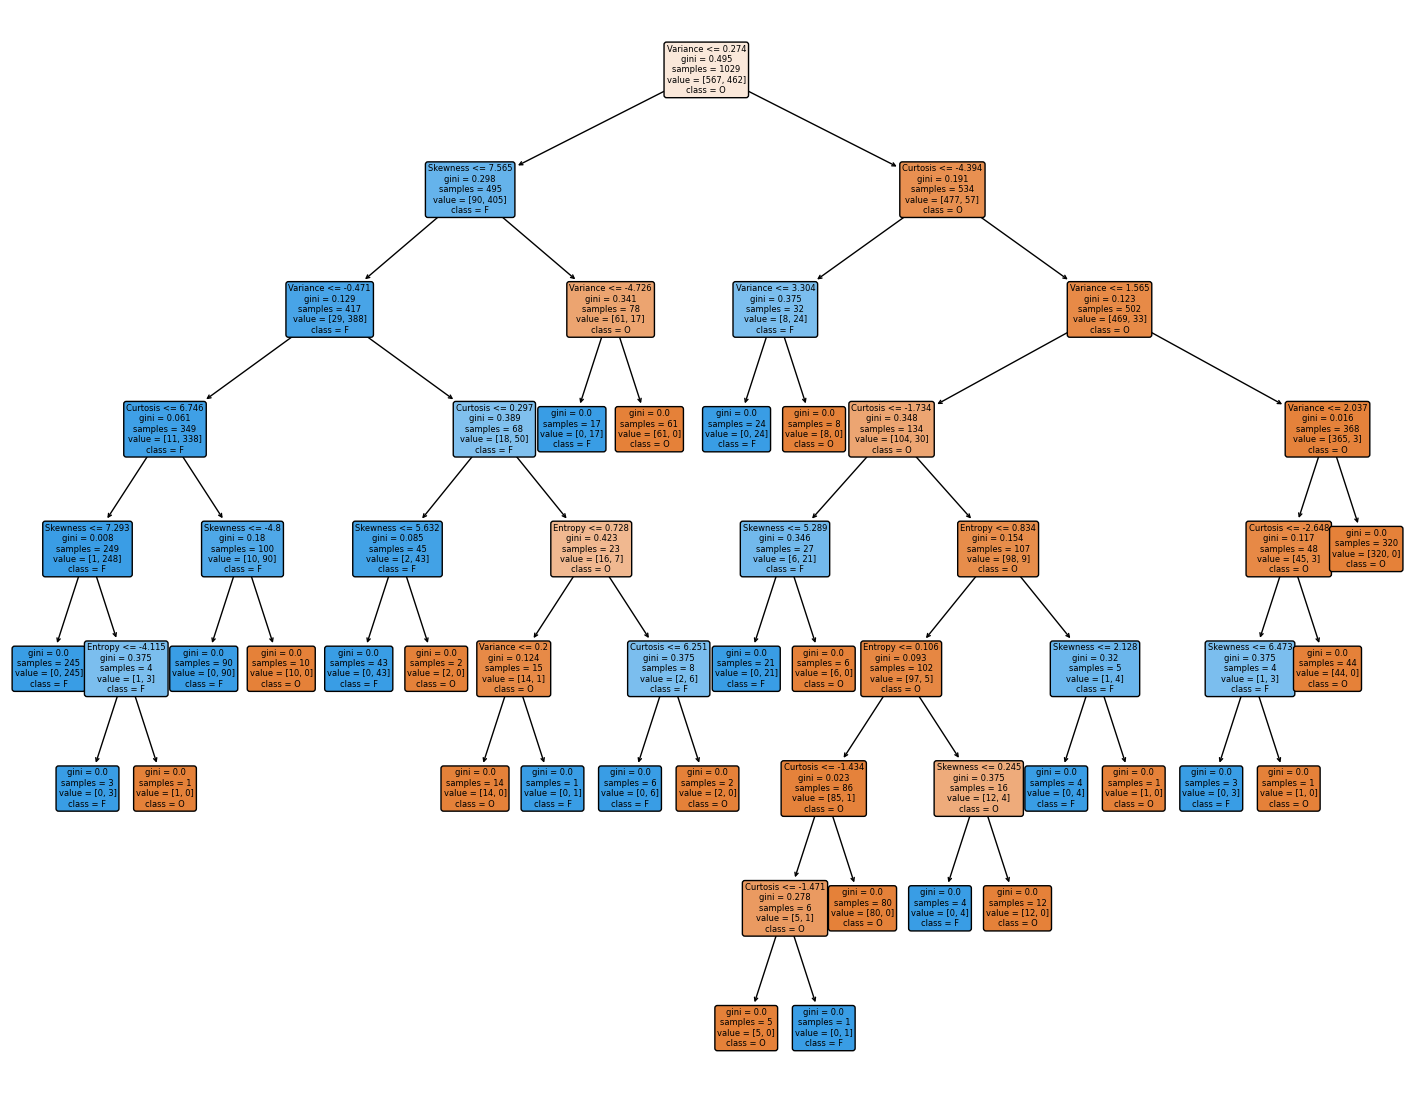

In [87]:
plt.figure(figsize=(18,14))
plot_tree(dt, fontsize=6, filled=True, rounded=True, class_names=['O','F'],feature_names=x.columns);

In [88]:
#### Performance Evaluation

In [90]:
y_pred=dt.predict(x_test)

In [91]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [92]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted':y_pred
})

In [93]:
result

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [94]:
(result['actual']==result['predicted']).sum()

336

In [95]:
(result['actual']!=result['predicted']).sum()

7

In [96]:
sum(y_test==y_pred)/len(y_test)

0.9795918367346939

In [98]:
y_test.value_counts()

Class
0    195
1    148
Name: count, dtype: int64

In [102]:
sum(y_test[y_test==0]== y_pred[y_test==0])

191

In [105]:
sum(y_test[y_test==1]== y_pred[y_test==1])

145

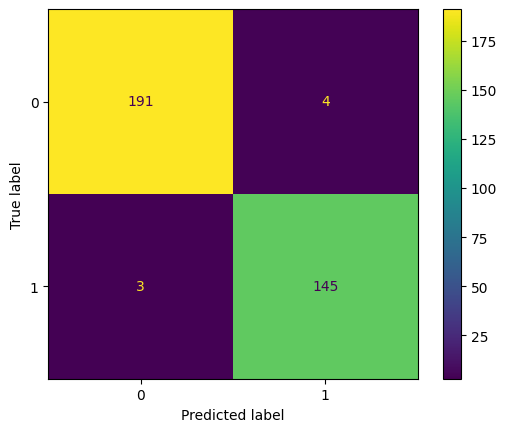

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

#### Feature Importance

In [109]:
dt.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

<BarContainer object of 4 artists>

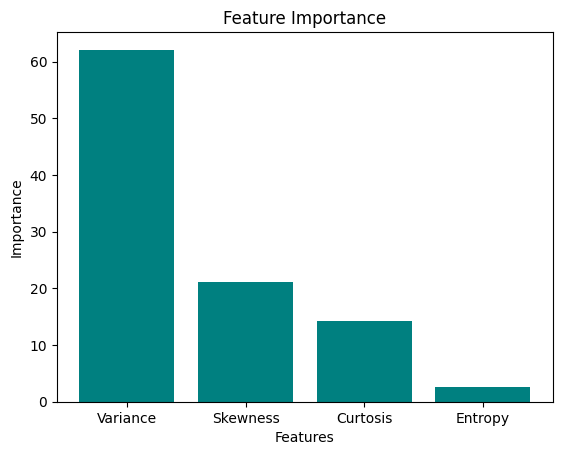

In [111]:
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.bar(x.columns, dt.feature_importances_ * 100, color='teal')

##### Prediction on unseen Data

In [113]:
new=pd.DataFrame(data=[[3.73210, -3.884000, 3.357700, -0.006049],
                       [-3.75030, -13.45860, 17.5932, -2.77710],
                       [-1.38870, -4.87730, 6.4774, 0.34179]],
                 columns=x.columns)

In [114]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.7321,-3.8840,3.3577,-0.006049
1,-3.7503,-13.4586,17.5932,-2.777100
2,-1.3887,-4.8773,6.4774,0.341790


In [116]:
dt.predict(new)

array([0, 1, 1])